<img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>

<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
07 Introduction to Models. Part 2.
<a class="tocSkip">   
</h1>  

In [47]:
# Standard Data Science Libraries Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats

sns.set(rc={'figure.figsize':(12, 8.5)})
#sns.set()

# Inference in Simple Linear Regression

## Introduction

+ Everything we have done up to this point in this session refers to a **single concrete sample**. That includes the part about goodness of fit: we were considering how the regression line fitted the particular sample from where it came. But since we are trying to do Statistics, we hould now widen our perspective and think in terms of populations and not just individual samples. 


+ Our starting point is the idea that the pattern we have spotted in a sample hints at a pattern when we move up to the population. That *population level pattern* is a *Linear Model*, which again is a mathematical abstraction defined as follows:
<p style='font-family: Optima;color:blue;background-color:#f0f0f5'>
$$
\fbox{
$
\quad\\
\hspace{0.5cm}\textbf{Simple Linear Regression Model.}
\quad\\
\quad\\
\hspace{1cm}Y_i = \underbrace{\beta_0 + \beta_1 X_i}_{\text{model}} + 
    \underbrace{\epsilon_i}_{\text{noise}}
\quad\\
\quad\\
$
}
$$
where $\beta_0, \beta_1$ are the <strong>model coeficients</strong>, while the  <strong>error variables</strong> $\epsilon_i$ are supposed to be independent and with normal distribution $N(0, \sigma)$. The parameter $\sigma$ is the common or <strong>homogeneous variance</strong> of all these error variables.  
</p> 

+ The **population regression line** $Y_i = \beta_0 + \beta_1 X_i$ that appears here, with coefficientes $\beta_0$ and $\beta_1$, is a **theoretical and non observable straight line**. When we havee a sample we can use it to obtain an **empirical regression line** that can be seen as a way to estimate the abstract line by means of the relations:
$$
\quad\\
\beta_0\approx b_0, \qquad \beta_1\approx b_1
\quad\\
$$

+ **Example:** let us run a simulation where we have 5 samples (of size $n = 30$ each) of a population in which we have two random variables related through an abstract linear model  
$$Y_i = 4 - 2 X_i + \epsilon_i$$
that is $\beta_0 = 4, \beta_1 = -2$. We also assume that the common variance for the errors is $\sigma^2 = 0.25$. Let us use NumPy to:

    1. Get those samples.
    2. Fit a regression line for each sample
    3. Do a scatterplot of the samples and their corresponding regression lines.
    4. Also add a dashed line representing the theoretical population line.
  
  We will add color to the plot to identify the samples.
    

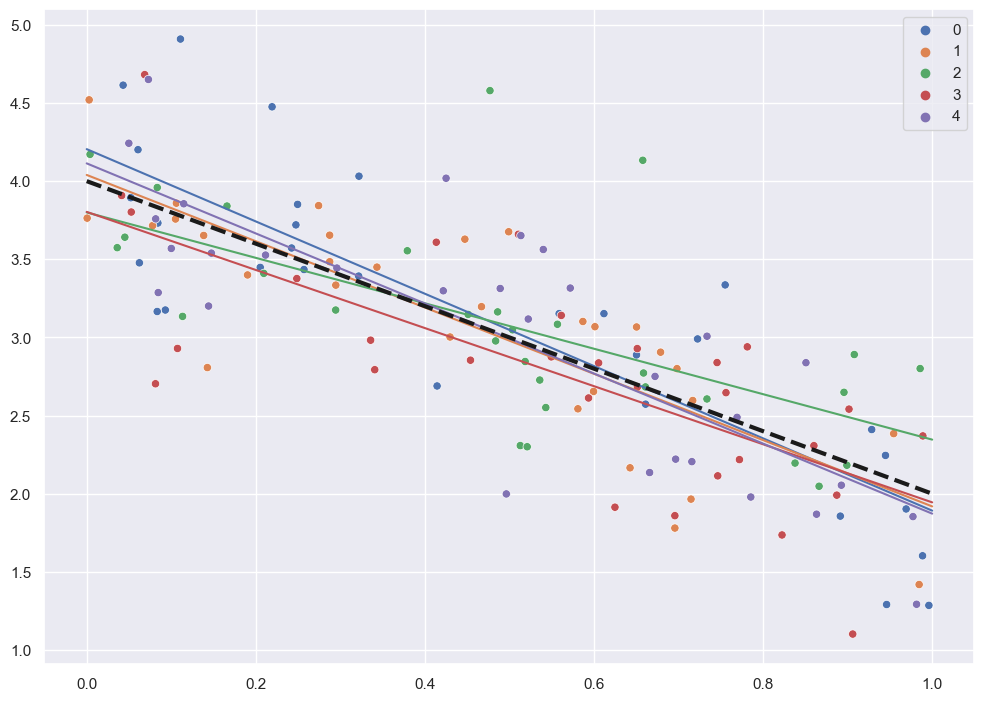

In [51]:
rng = np.random.default_rng(2022)

# Common error variance for the linear model
sigma = 0.5
# Number of samples
N = 5
# Sample size
n = 30
# A column to distinguish the data in each sample from the other samples
sampleId = np.repeat(np.arange(N), n)
# The X part of the samples
X = rng.uniform(size = N * n)
# The error variables
Eps = rng.normal(loc = 0, scale = sigma, size = N * n)
# And the Y part according to the model
Y = beta0 + beta1 * X + Eps
# Put it all together in a DataFrame
DF = pd.DataFrame({'X': X, 'Y':Y, 'sampleId':sampleId})
# print(DF.head(20)) # test the result
# And plot it using color to identify samples
sns.scatterplot(data = DF, x = X, y = Y, 
                hue = sampleId, palette="deep", alpha = 30/n)

from sklearn.linear_model import LinearRegression

# This function gets the coefficients for the regression line
# of Y vs X. Both are assumed t be numerical pandas series of the
# same length.
def getLM(X, Y):
    modelXY = LinearRegression(fit_intercept=True)
    X = X.values[:, np.newaxis]
    Y = Y.values
    XY_fit = modelXY.fit(X, Y)
    b1 = XY_fit.coef_[0]
    b0 = XY_fit.intercept_
    return((b0, b1))

# Now let us fit a regression line for each sample and plot the result.
palette2 = iter(sns.color_palette(palette="deep", n_colors=N))

for sample in range(N):
    # select the sample
    DFs = DF.loc[sampleId == sample, :] 
    Xs = DFs.X
    Ys = DFs.Y
    # fit the regression line
    b0, b1 = getLM(Xs,Ys)
    # plot the line
    Xnew = np.linspace(0, 1, num = 100)
    Ynew = b0 + b1 * Xnew
    plt.plot(Xnew, Ynew, color = next(palette2))

Xnew = np.linspace(0, 1, num = 100)
Ynew = beta0 + beta1 * Xnew
plt.plot(Xnew, Ynew, "k--", lw = 3)

plt.show()

## Varianza residual.

+ Tenemos por tanto que ser capaces, entre otras cosas, de estimar $\beta_0$ y $\beta_1$, por ejemplo mediante intervalos de confianza calculados a partir de una muestra. Además también nos interesa el contraste de hipótesis nula $H_0 = \{\beta_1 = 0\}$, porque nos dirá si las variables están o no correlacionadas.

+ Como veremos el ingrediente esencial para todo esto es la siguiente estimación de $\sigma^2$, la denominada **varianza residual**.  
  $$
  \hat\sigma^2 = \dfrac{1}{n - 2}\sum_i{e_i^2}
  $$
  Observaciones:  
  
    $\cdot$ Usamos el símbolo $\hat\sigma$ en lugar de $\sigma$ para indicar que es una *estimación muestral*. Esta notación es la habitual en Estadística para estimadores.   
    $\cdot$ Dividimos por $n - 2$ por la misma razón que en la varianza muestral, para tener un *estimador insesgado*. Además ese dos significa que tenemos *dos grados de libertad*, porque hay dos parámetros $\beta_0$ y $\beta_1$ en el modelo lineal.  
    $\cdot$ Si se piensa un poco sobre la ecuación del modelo y el papel de $\sigma$ es razonable que la estimación de $\sigma^2$ sea en términos de los cuadrados de los residuos (¡tienen media 0!).

## Inferencia sobre los valores de $\beta_0, \beta_1$.

+ Las varianzas muestrales de los coeficientes son:
  $$
  \sigma^2_{b_1} = \dfrac{\sigma^2}{\sum_{i=1}^n(X_i - \bar X)^2},\qquad\qquad
  \sigma^2_{b_0} = \left(\dfrac{1}{n} + \dfrac{\bar X^2}{\sum_{i=1}^n(X_i - \bar X)^2}\right)\sigma^2
  $$
  Para usar esto en la estimación sustituiremos $\sigma^2$ por el estimador $\hat\sigma^2$ basado en la varianza residual que hemos visto. 
  
+ Si se cumplen las hipótesis del modelo entonces 
$$\dfrac{b_i - \beta_i}{\sigma^2_{b_i}}$$
(para $i = 0, 1$ y remplazando $\sigma^2$ por $\hat\sigma^2$) sigue una distribución $t$ de Student con $n - 2$ grados de libertad.

+ A partir de estos resultados sobre distribución muestral podemos construir los intervalos de confianza y los contrastes de hipótesis necesarios. Por ejemplo, un intervalo de confianza al nivel $nc = 1 - \alpha$ para la pendiente $\beta_1$ es:
$$
\beta_1 = b_1 \pm t_{n-2; \alpha/2}\dfrac{\hat\sigma^2}{\sum_{i=1}^n(X_i - \bar X)^2}
$$

## Bandas de confianza y predicción para valores de $Y$.  

# Diagnosis for the Simple Linear Regression Model

# Beyond the Basic Linear Model